In [1]:
import numpy as np
import pandas as pd
import prepare as pr
import matplotlib.pyplot as plt
import seaborn as sns
import explore as ex

from sklearn.feature_selection import SelectKBest, f_regression
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings

In [2]:
df=pr.clean_df()

In [3]:
df.shape

(1391, 16)

In [4]:
train, val, test=ex.tts(df)

In [59]:
train.head()

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
404,57905088,98.0,100.0,100.0,100.0,100.0,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8
429,57912005,45.0,47.0,79.0,94.0,75.0,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1
621,81902002,69.0,79.0,74.0,86.0,93.0,4.5,53.5,56116.0,5.2,1071.0,9636.0,11.3,29.7,65.2,22.8
1090,161918001,81.0,71.0,63.0,82.0,89.0,0.0,34.1,54056.0,13.0,2818.0,21893.0,8.3,28.2,58.8,23.7
598,75908001,90.0,90.0,96.0,100.0,96.0,2.8,29.2,46058.0,20.5,532.0,10824.0,7.3,45.2,34.2,20.5


### Run for biology

In [60]:
X_train=train.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
y_train=pd.DataFrame(train['biology'])

X_val=val.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
y_val=pd.DataFrame(val['biology'])

X_test=test.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
y_test=pd.DataFrame(test['biology'])

In [61]:
scaler=sklearn.preprocessing.MinMaxScaler()

In [62]:
num_cols = ['bilingual_or_english_learner',
            'econdis',
            'salary',
            'teacher_exp_6to10',
            'extracurricular_expend',
            'total_expend',
            'student_teacher_ratio',
            'teacher_exp_0to5',
            'teacher_exp_11_plus',
            'high_edu']
scaler.fit(X_train)

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [63]:
X_train.head()

,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
404,0.306225,0.878758,0.840700,0.471103,0.010898,0.054828,0.543046,0.224,0.507,0.557908
429,0.476908,0.853707,0.723245,0.353765,0.003728,0.313039,0.102649,0.519,0.279,0.387298
621,0.045181,0.534068,0.554878,0.091068,0.307141,0.086441,0.281457,0.297,0.652,0.283935
1090,0.000000,0.339679,0.510830,0.227671,0.808145,0.272907,0.182119,0.282,0.588,0.295143
598,0.028112,0.290581,0.339812,0.359019,0.152567,0.104514,0.149007,0.452,0.342,0.255293


In [41]:
def get_baseline_biology(t, v):
    '''
    setting a mean and median baseline value for train and validate sets
    '''
    t['base_med']=t['biology'].median()
    t['Baseline Mean']=t['biology'].mean()

    v['base_med']=v['biology'].median()
    v['Baseline Mean']=v['biology'].mean()
    '''
    calculating RMSE for train and validate baselines
    '''
    med=mean_squared_error(t['biology'], t['base_med'], squared=False)
    mea=mean_squared_error(t['biology'], t['Baseline Mean'], squared=False)

    med_v=mean_squared_error(v['biology'], v['base_med'], squared=False)
    mea_v=mean_squared_error(v['biology'], v['Baseline Mean'], squared=False)
    '''
    Printing results
    '''
    print(f'Train RMSE for the median baseline is {med}')
    print(f'Train RMSE for the mean baseline is {mea}')
    print('\n')
    print(f'Validate RMSE for the median baseline is {med_v}')
    print(f'Validate RMSE for the mean baseline is {mea_v}')
    '''
    dropping the higher RMSE
    '''
    t=t.drop(columns=['base_med'])
    v=v.drop(columns=['base_med'])
    return t, v

In [42]:
train, val=get_baseline_biology(train, val)

Train RMSE for the median baseline is 14.138863285740246
Train RMSE for the mean baseline is 13.76826771391201


Validate RMSE for the median baseline is 13.858459013452574
Validate RMSE for the mean baseline is 13.354410750492981


In [43]:
def get_baseline_english_1(t, v):
    '''
    setting a mean and median baseline value for train and validate sets
    '''
    t['base_med']=t['english_1'].median()
    t['Baseline Mean']=t['english_1'].mean()

    v['base_med']=v['english_1'].median()
    v['Baseline Mean']=v['english_1'].mean()
    '''
    calculating RMSE for train and validate baselines
    '''
    med=mean_squared_error(t['english_1'], t['base_med'], squared=False)
    mea=mean_squared_error(t['english_1'], t['Baseline Mean'], squared=False)

    med_v=mean_squared_error(v['english_1'], v['base_med'], squared=False)
    mea_v=mean_squared_error(v['english_1'], v['Baseline Mean'], squared=False)
    '''
    Printing results
    '''
    print(f'Train RMSE for the median baseline is {med}')
    print(f'Train RMSE for the mean baseline is {mea}')
    print('\n')
    print(f'Validate RMSE for the median baseline is {med_v}')
    print(f'Validate RMSE for the mean baseline is {mea_v}')
    '''
    dropping the higher RMSE
    '''
    t=t.drop(columns=['base_med'])
    v=v.drop(columns=['base_med'])
    return t, v

In [45]:
train, val=get_baseline_english_1(train, val)

Train RMSE for the median baseline is 17.643280506858744
Train RMSE for the mean baseline is 17.621104601122024


Validate RMSE for the median baseline is 17.664792956036614
Validate RMSE for the mean baseline is 17.625561344465574


In [46]:
train.head()

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu,Baseline Mean
404,57905088,98.0,100.0,100.0,100.0,100.0,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8,67.115681
429,57912005,45.0,47.0,79.0,94.0,75.0,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1,67.115681
621,81902002,69.0,79.0,74.0,86.0,93.0,4.5,53.5,56116.0,5.2,1071.0,9636.0,11.3,29.7,65.2,22.8,67.115681
1090,161918001,81.0,71.0,63.0,82.0,89.0,0.0,34.1,54056.0,13.0,2818.0,21893.0,8.3,28.2,58.8,23.7,67.115681
598,75908001,90.0,90.0,96.0,100.0,96.0,2.8,29.2,46058.0,20.5,532.0,10824.0,7.3,45.2,34.2,20.5,67.115681


# Select K Best

In [12]:
f_selector = SelectKBest(f_regression, k=4)

In [13]:
f_selector.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=4, score_func=<function f_regression at 0x159e38b80>)

In [14]:
X_reduced = f_selector.transform(X_train)

print(X_train.shape)
print(X_reduced.shape)

(778, 10)
(778, 4)


In [15]:
f_support = f_selector.get_support()

print(f_support) 

[ True  True False False False False False  True  True False]


In [16]:
f_feature = X_train.loc[:,f_support].columns.tolist()

print(str(len(f_feature)), 'selected features')
print(f_feature)


4 selected features
['bilingual_or_english_learner', 'econdis', 'teacher_exp_0to5', 'teacher_exp_11_plus']


# Recursive Feature Elimination

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [18]:
lm = LinearRegression()

In [19]:
rfe = RFE(lm, n_features_to_select=2)

In [20]:
X_rfe = rfe.fit_transform(X_train,y_train)  

In [21]:
lm.fit(X_rfe,y_train)

LinearRegression()

In [35]:
X_rfe

array([[0.224, 0.507],
       [0.519, 0.279],
       [0.297, 0.652],
       ...,
       [0.281, 0.461],
       [0.284, 0.677],
       [0.382, 0.487]])

In [22]:
mask = rfe.support_

In [23]:
rfe_features = X_train.loc[:,mask].columns.tolist()

In [24]:
print(str(len(rfe_features)), 'selected features')
print(rfe_features)

2 selected features
['teacher_exp_0to5', 'teacher_exp_11_plus']


In [25]:
var_ranks = rfe.ranking_
var_names = X_train.columns.tolist()

pd.DataFrame({'Var': var_names, 'Rank': var_ranks}).sort_values('Rank')

,Var,Rank
7,teacher_exp_0to5,1
8,teacher_exp_11_plus,1
3,teacher_exp_6to10,2
5,total_expend,3
1,econdis,4
0,bilingual_or_english_learner,5
6,student_teacher_ratio,6
2,salary,7
4,extracurricular_expend,8
9,high_edu,9


(array([  4.,   6.,   6.,   7.,  19.,  59.,  90., 140., 213., 234.]),
 array([ 19. ,  27.1,  35.2,  43.3,  51.4,  59.5,  67.6,  75.7,  83.8,
         91.9, 100. ]),
 <BarContainer object of 10 artists>)

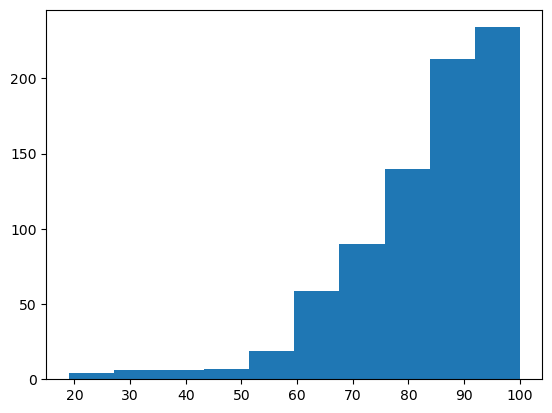

In [26]:
plt.hist(y_train)

In [49]:
# create the model object
lm = LinearRegression()

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.biology)

# predict train
y_train['biology_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.biology, y_train.biology_pred_lm, squared=False)

# predict validate
y_val['biology_pred_lm'] = lm.predict(X_val)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.biology, y_val.biology_pred_lm, squared=False)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for OLS using LinearRegression
Training/In-Sample:  11.461461589229287 
Validation/Out-of-Sample:  11.22074182810478


In [38]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.biology)

# predict train
y_train['biology_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.biology, y_train.biology_pred_lars, squared=False)
# predict validate
y_val['biology_pred_lars'] = lars.predict(X_val)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.biology, y_val.biology_pred_lars, squared=False)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Lasso + Lars
Training/In-Sample:  13.76826771391201 
Validation/Out-of-Sample:  13.363311468906566


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [39]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.biology)

# predict train
y_train['biology_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.biology, y_train.biology_pred_glm, squared=False)

# predict validate
y_val['biology_pred_glm'] = glm.predict(X_val)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.biology, y_val.biology_pred_glm, squared=False)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  11.482888083468334 
Validation/Out-of-Sample:  11.205120862735335


In [30]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_val)
X_test_degree2 = pf.transform(X_test)


In [31]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.biology)

# predict train
y_train['biology_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.biology, y_train.biology_pred_lm2, squared=False)

# predict validate
y_val['biology_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.biology, y_val.biology_pred_lm2, squared=False)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  10.35117215495004 
Validation/Out-of-Sample:  11.42438095347774


In [32]:
y_train

,biology,biology_pred_lm,biology_pred_lars,biology_pred_glm,biology_pred_lm2
404,100.0,77.549504,82.784062,77.440014,81.045276
429,94.0,63.851688,82.784062,63.846127,76.767240
621,86.0,84.175612,82.784062,84.364556,83.870758
1090,82.0,84.830152,82.784062,83.349718,102.900658
598,100.0,88.116204,82.784062,87.609267,83.679607
...,...,...,...,...,...
1184,94.0,69.076060,82.784062,68.819092,66.473650
1194,50.0,89.223746,82.784062,89.253209,72.232922
1401,48.0,71.318101,82.784062,71.303313,72.302406
985,87.0,87.208690,82.784062,87.001350,89.901618


In [33]:
y_val['biology_pred_mean']= y_val['biology'].mean()

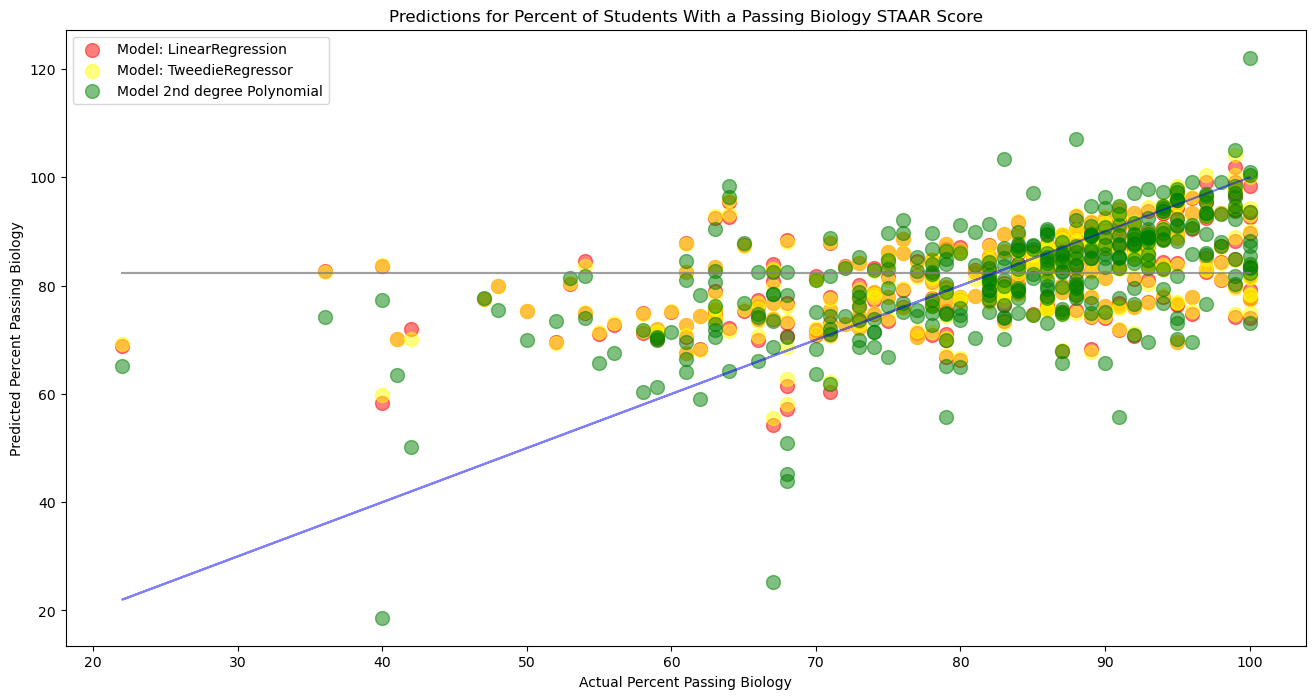

In [34]:
plt.figure(figsize=(16,8))
plt.plot(y_val.biology, y_val.biology_pred_mean, alpha=.75, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_val.biology, y_val.biology, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_val.biology, y_val.biology_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_val.biology, y_val.biology_pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_val.biology, y_val.biology_pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Percent Passing Biology")
plt.ylabel("Predicted Percent Passing Biology")
plt.title("Predictions for Percent of Students With a Passing Biology STAAR Score")
plt.show()


# English 1

### Run for english 1

In [64]:
y_train=pd.DataFrame(train['english_1'])
y_val=pd.DataFrame(val['english_1'])
y_test=pd.DataFrame(test['english_1'])

In [65]:
# create the model object
lm = LinearRegression()

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.english_1)

# predict train
y_train['english_1_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.english_1, y_train.english_1_pred_lm, squared=False)

# predict validate
y_val['english_1_pred_lm'] = lm.predict(X_val)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.english_1, y_val.english_1_pred_lm, squared=False)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  13.836784380571657 
Validation/Out-of-Sample:  13.755213417701222


In [66]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.english_1)

# predict train
y_train['english_1_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.english_1, y_train.english_1_pred_lars, squared=False)
# predict validate
y_val['english_1_pred_lars'] = lars.predict(X_val)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.english_1, y_val.english_1_pred_lars, squared=False)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  17.621104601122024 
Validation/Out-of-Sample:  17.672875380462788


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [67]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.english_1)

# predict train
y_train['english_1_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.english_1, y_train.english_1_pred_glm, squared=False)

# predict validate
y_val['english_1_pred_glm'] = glm.predict(X_val)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.english_1, y_val.english_1_pred_glm, squared=False)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  13.839046433545262 
Validation/Out-of-Sample:  13.769725563213623


In [74]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_val)
X_test_degree2 = pf.transform(X_test)

In [75]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.english_1)

# predict train
y_train['english_1_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.english_1, y_train.english_1_pred_lm2, squared=False)

# predict validate
y_val['english_1_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_val.english_1, y_val.english_1_pred_lm2, squared=False)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  12.20801769693785 
Validation/Out-of-Sample:  14.527012461493946


In [18]:
def english_1_model(df, target, degree=2):
    '''
    this function will split, scale, and model english 1
    '''
    train, val, test=ex.tts(df)
    
    X_train=train.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    y_train=pd.DataFrame(train[target])

    X_val=val.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    y_val=pd.DataFrame(val[target])

    X_test=test.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    y_test=pd.DataFrame(test[target])
    
    scaler=sklearn.preprocessing.MinMaxScaler()
    
    num_cols = ['bilingual_or_english_learner',
            'econdis',
            'salary',
            'teacher_exp_6to10',
            'extracurricular_expend',
            'total_expend',
            'student_teacher_ratio',
            'teacher_exp_0to5',
            'teacher_exp_11_plus',
            'high_edu']
    scaler.fit(X_train)

    X_train[num_cols] = scaler.transform(X_train[num_cols])
    X_val[num_cols] = scaler.transform(X_val[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])
    
    '''
    this model will create the object and run the polynomyal regression model for english 1
    '''
    pf = PolynomialFeatures(degree=degree)
    
    X_train_degree2 = pf.fit_transform(X_train)
    X_validate_degree2 = pf.transform(X_val)
    X_test_degree2 = pf.transform(X_test)
    
    lm2 = LinearRegression()
    lm2.fit(X_train_degree2, y_train[target])

    y_train[f'{target}_pred_lm2'] = lm2.predict(X_train_degree2)
    rmse_train = mean_squared_error(y_train[target], y_train[f'{target}_pred_lm2'], squared=False)

    y_val[f'{target}_pred_lm2'] = lm2.predict(X_validate_degree2)
    rmse_validate = mean_squared_error(y_val[target], y_val[f'{target}_pred_lm2'], squared=False)

    print(f"RMSE for Polynomial Model, degrees={degree}\nTraining/In-Sample: ", rmse_train, 
          "\nValidation/Out-of-Sample: ", rmse_validate)

In [19]:
english_1_model(df, 'english_1', 1)

RMSE for Polynomial Model, degrees=1
Training/In-Sample:  13.836784380571657 
Validation/Out-of-Sample:  13.755213417701228


In [24]:
def model_results(df):
    train, val, test= ex.tts(df)
    target=['english_1', 'english_2', 'algebra','biology', 'history']
    subject=['English 1', 'English 2', 'Algebra', 'Biology', 'U.S. History']
    rmse_base_t=[]
    rmse_base_v=[]
    rmse_train=[]
    rmse_val=[]
    
    X_train=train.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    X_val=val.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    X_test=test.drop(columns=['biology', 'english_1', 'english_2', 'algebra', 'history', 'school_id'])
    
    lm=LinearRegression()
    for t in target:
        y_train=pd.DataFrame(train[t])
        y_val=pd.DataFrame(val[t])
        y_test=pd.DataFrame(test[t])
        
        lm.fit(X_train, y_train[t])
        pred_t= lm.predict(X_train)
        pred_v= lm.predict(X_val)
        
        train['Baseline Mean'] = train[t].mean()
        rmse_base_t.append(mean_squared_error(train[t], train['Baseline Mean'], squared=False))
        val['Baseline Mean'] = val[t].mean()
        rmse_base_v.append(mean_squared_error(val[t], val['Baseline Mean'], squared=False))
        
        rmse_train.append(mean_squared_error(y_train[t], pred_t, squared=False))
        rmse_val.append(mean_squared_error(y_val[t], pred_v, squared=False))
        
    results=pd.DataFrame(index=subject, data= {
        'Train Baseline RMSE': rmse_base_t,
        'Validate Baseline RMSE': rmse_base_v,
        'Train Model RMSE': rmse_train,
        'Validate Model RMSE': rmse_val,
    })
    results['Model Difference']=results['Train Model RMSE']- results['Validate Model RMSE']
    return results
        
        
        

In [25]:
model_results(df)

,Train Baseline RMSE,Validate Baseline RMSE,Train Model RMSE,Validate Model RMSE,Model Difference
English 1,17.621105,17.625561,13.836784,13.755213,0.081571
English 2,16.370091,16.180676,12.825528,12.618093,0.207434
Algebra,17.829199,16.901255,16.140168,15.835747,0.304421
Biology,13.768268,13.354411,11.461462,11.220742,0.240720
U.S. History,11.018929,10.230069,9.387695,8.717284,0.670411


In [ ]:
def modeling_visual(df):
    ma=modeling_results(df)

    plt.figure(figsize=(10,5))
    X = ['English 1', 'English 2', 'Algebra', 'Biology', 'U.S. History']

    X_axis = np.arange(len(X))

    plt.bar(X_axis[0] - 0.2, ma['Train Baseline RMSE'][0], 0.2, 
            label = 'Baseline', color=['blue'], ec='black')
    plt.bar(X_axis[0] + 0.0, ma['Train Model RMSE'][0], 0.2, 
            label = 'Below Average', color=['orange'], ec='black')
    plt.bar(X_axis[0] + 0.2, ma['Validate Model RMSE'][0], 0.2, 
            label = 'Below Average', color=['orange'], ec='black')

    plt.bar(X_axis[1] - 0.1, ma['Above Average'][1], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[1] + 0.1, ma['Below Average'][1], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[2] - 0.1, ma['Above Average'][2], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[2] + 0.1, ma['Below Average'][2], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[3] - 0.1, ma['Above Average'][3], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[3] + 0.1, ma['Below Average'][3], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[4] - 0.1, ma['Above Average'][4], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[4] + 0.1, ma['Below Average'][4], 0.2, color=['orange'], ec='black')


    plt.xticks(X_axis, X)
    plt.xlabel("Subject")
    plt.ylabel("Percent Passing")
    plt.title("Percent of Students Passing STAAR Subjects Based on Teacher Experience")
    plt.ylim(60, 95)
    plt.grid(True, alpha=0.3, linestyle='--')
    leg = plt.legend(title="Teachers With 11+ Years of Experience")
    leg._legend_box.align = "left"
    plt.show()

In [ ]:
plt.bar(X_axis[0] - 0.2, trainacc, 0.2, label = 'Train Accuracy', color=['blue'], ec='black')
    plt.bar(X_axis[0] + 0, valacc, 0.2, label = 'Validate Accuracy', color=['green'], ec='black')
    plt.bar(X_axis[0] + 0.2, testacc, 0.2, label = 'Test Accuracy', color=['rebeccapurple'], ec='black')